In [1]:
from __future__ import division
import os
import sys
import copy
import numpy as np
from numpy import ma
import math as m
import pandas as pd
import string

import pickle
from numpy import genfromtxt
from scipy.interpolate import griddata
import matplotlib.pyplot as plt
plt.style.use('default')
import matplotlib.gridspec as gridspec
import matplotlib.ticker as ticker
import matplotlib.colors as colors

import datetime
from matplotlib.dates import DayLocator, MonthLocator, HourLocator, AutoDateLocator, DateFormatter, drange
from matplotlib.dates import MO, TU, WE, TH, FR, SA, SU, WeekdayLocator
from numpy import arange
from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import NullFormatter
from mpl_toolkits.axes_grid1 import make_axes_locatable

import matplotlib.cm as cm
import matplotlib.mlab as mlab

import glob

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
darkblue = '#4e79a7'
orange = '#f28e2b'
red = '#e15759'
lightblue = '#76b7b2'
green = '#59a14f'
yellow = '#edc948'
purple = '#b07aa1'
pink = '#ff9da7'
brown = '#9c755f'
gray = '#bab0ac'

date1 = datetime.datetime(2018, 1, 1, 0)
date2 = datetime.datetime(2019, 1, 1, 0)
delta = datetime.timedelta(hours=1)
dates = drange(date1, date2, delta)

In [5]:
def get_series(path, time_series):
    pickle_in = open(glob.glob(path + '/*.pickle')[0], 'rb')
    base = pickle.load(pickle_in)
    info = base[0]
    inputs = base[0][1]
    results = base[1]
    return results[2][time_series]

############### Li-ion + PGP ###############
path_1 = '../../Output_Data/CONUS/Two_Techs_Li-ion_X/Li-ion_PGP'

pgp_energy_1 = get_series(path_1, 'PGP_storage stored')
li_ion_energy_1 = get_series(path_1, 'battery stored')

############### Li-ion + PGP + CAES ###############
path_2 = '../../Output_Data/CONUS/Three_Techs_Li-ion_PGP_X/CAES'

pgp_energy_2 = get_series(path_2, 'PGP_storage stored')
li_ion_energy_2 = get_series(path_2, 'battery stored')
storage_x_energy_2 = get_series(path_2, 'third_tech_energy stored')

############### Li-ion + PGP + Metal-Air ###############
path_3 = '../../Output_Data/CONUS/Three_Techs_Li-ion_PGP_X/Metal-Air'

pgp_energy_3 = get_series(path_3, 'PGP_storage stored')
li_ion_energy_3 = get_series(path_3, 'battery stored')
storage_x_energy_3 = get_series(path_3, 'third_tech_energy stored')

KeyError: 'third_tech_energy stored'

In [5]:
# Font / Figure Size
import matplotlib.pylab as pylab
params = {'legend.fontsize': '7',
         'axes.labelsize': '7',
         'axes.titlesize': '7',
         'xtick.labelsize': '7',
         'ytick.labelsize': '7',
          
         'xtick.major.pad': '7',
         'ytick.major.pad': '7',
         'axes.titlepad': 10,
         'axes.labelpad': 15,
         
         'font.sans-serif':'Avenir',
         
         'axes.linewidth': 0.5,
         'xtick.major.width': 0.5,
         'ytick.major.width': 0.5}
pylab.rcParams.update(params)

/central/software/python/3.7.0/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


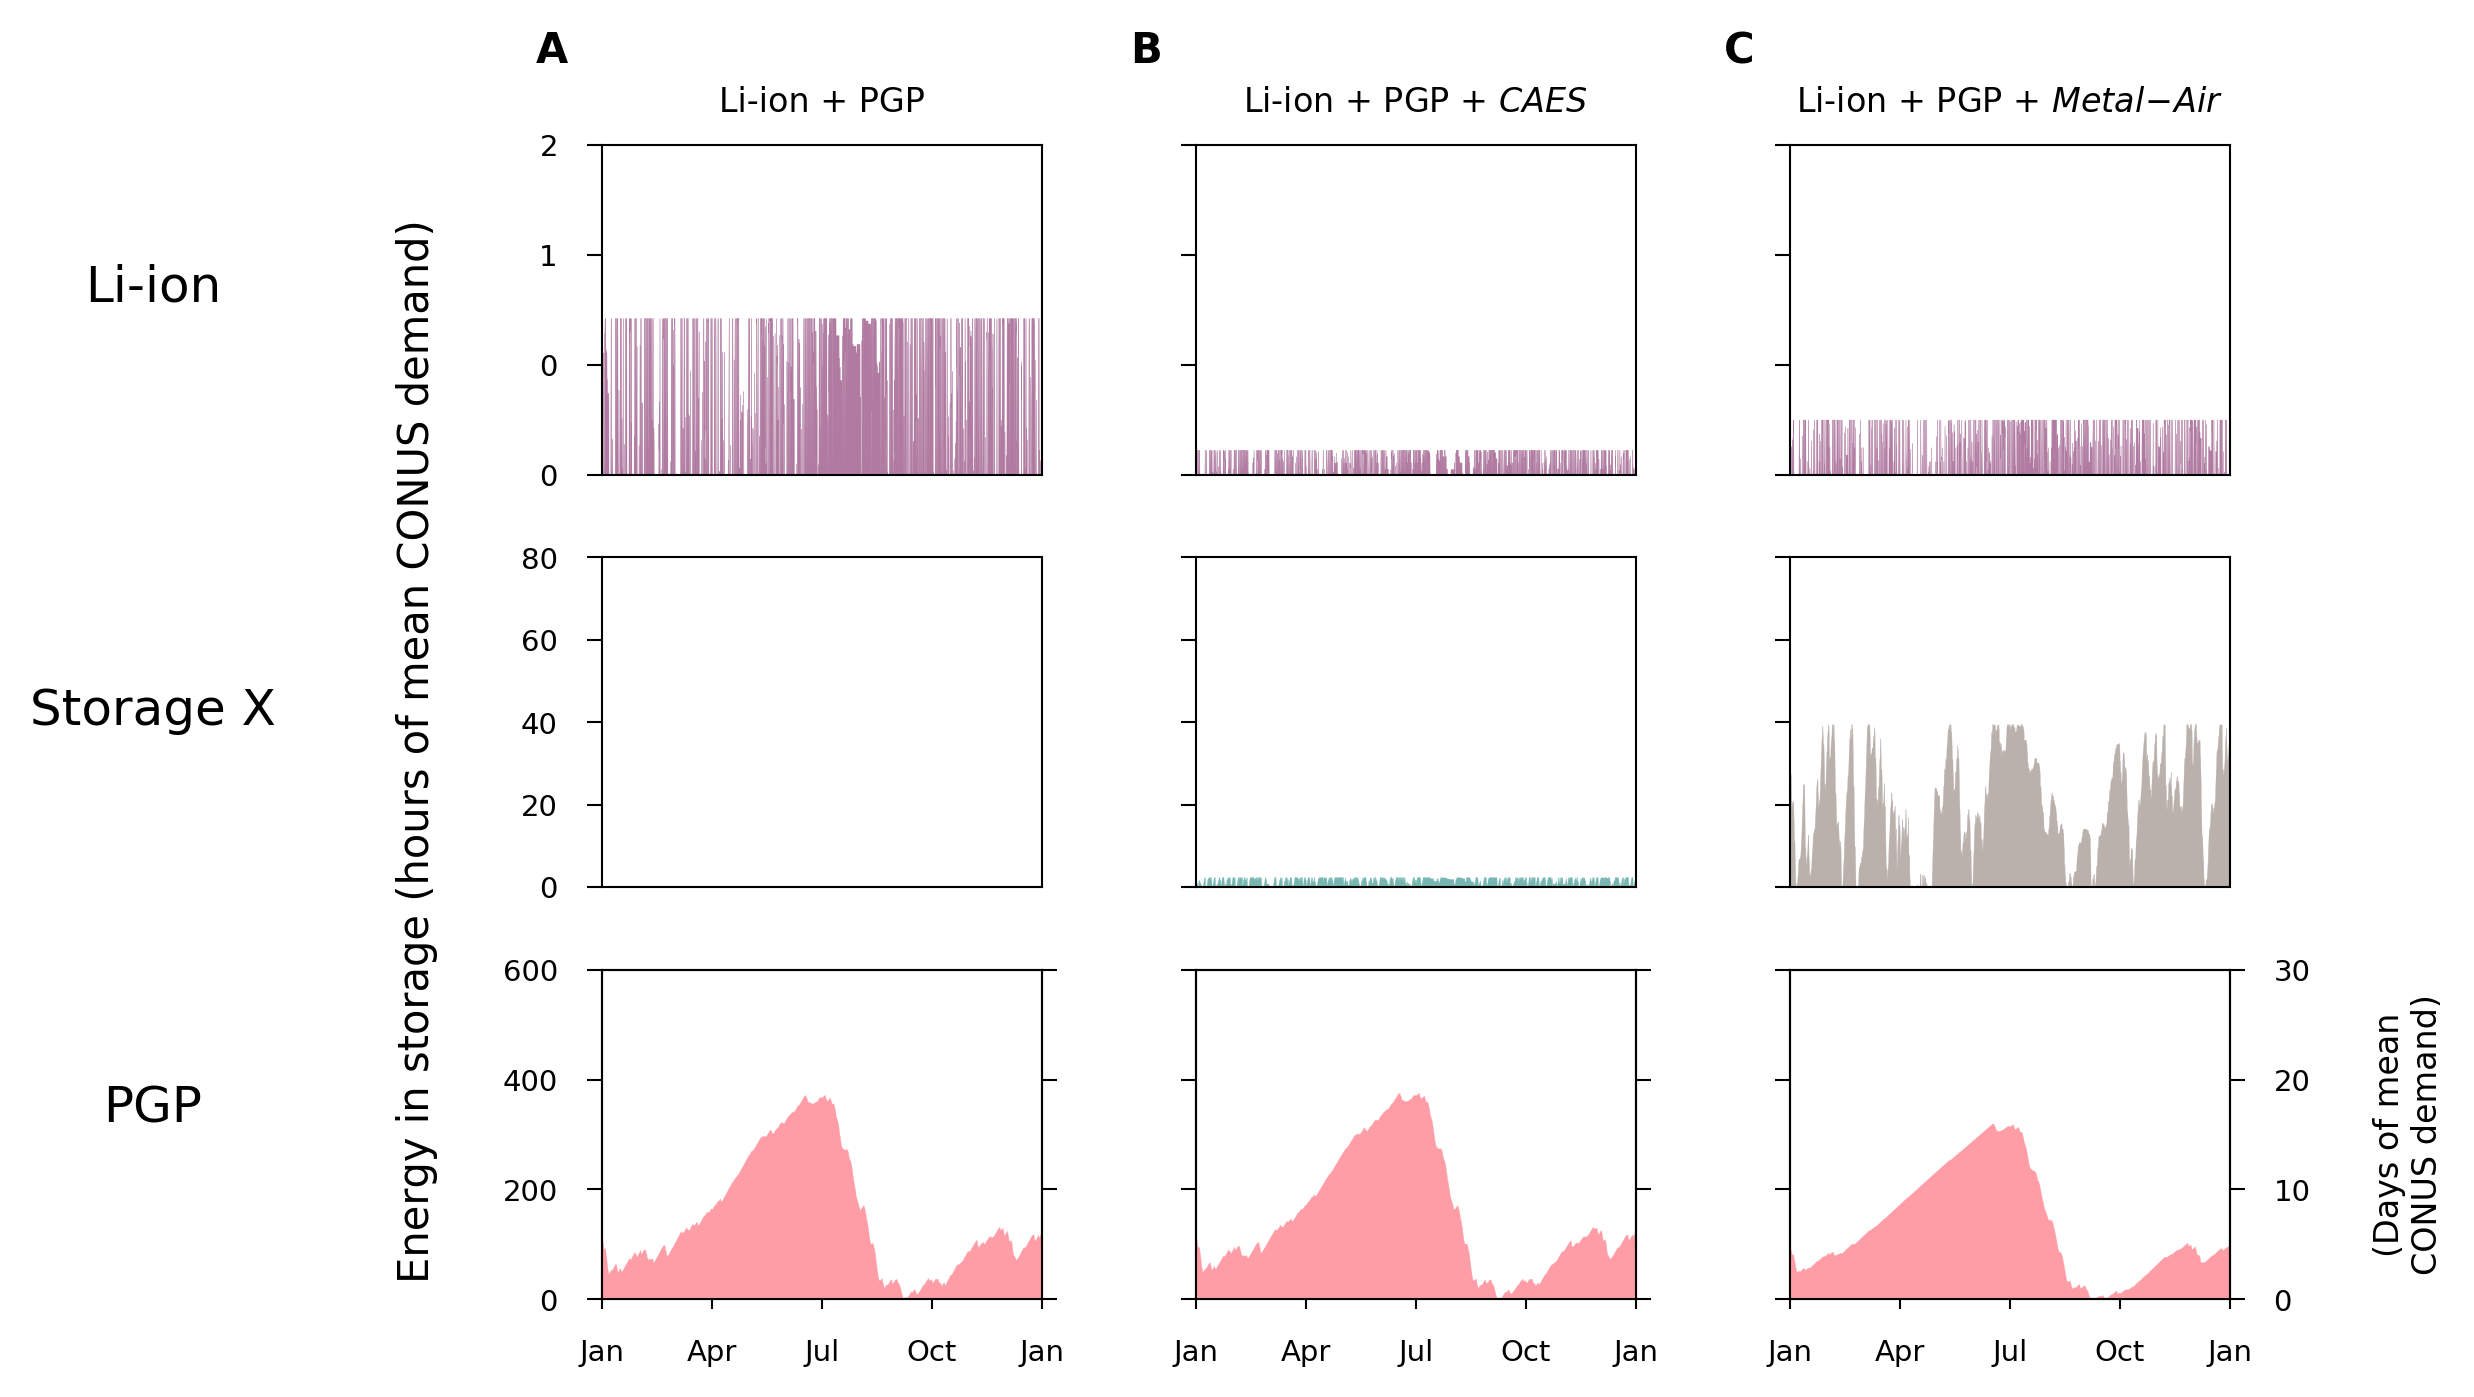

In [9]:
mm = 1/25.4 # millimeters in inches
fig_w = 172*mm
fig_h = 112*mm
fig, ax = plt.subplots(ncols=3, nrows=3, figsize=(fig_w, fig_h), dpi=300)

w = 0.075
pgp_max = 600
pgp_days_max = 30
storage_x_max = 80
li_ion_max = 1.5

def plot_energy(ax, energy, energy_max, color):
    ax.fill_between(dates, energy, color=color, linewidth=w)
    ax.set_xlim(dates[0], dates[-1])
    ax.set_ylim(0, energy_max)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.xaxis.set_tick_params(direction='out', which='both', length=0)
    ax.yaxis.set_tick_params(direction='out', which='both')
    
def bottom_params(ax):
    ax.tick_params(axis='x', which='both', length=2.5)
    months = ['Jan', 'Apr', 'Jul', 'Oct', 'Jan']
    plt.xticks(np.linspace(dates[0], dates[-1], 5), months)
    
def left_params(ax):
    ax.set_yticklabels(ax.get_yticks())
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
    
#########################################################################################################
#                                             CASE 1                                                   #
#########################################################################################################
    
# Li-ion energy in storage
plot_energy(ax[0,0], li_ion_energy_1, li_ion_max, purple)
left_params(ax[0,0])

# No Storage X (placeholder)
plot_energy(ax[1,0], [0]*len(pgp_energy_1), storage_x_max, green)
left_params(ax[1,0])

# PGP energy in storage
plot_energy(ax[2,0], pgp_energy_1, pgp_max, pink)

ax_days_1 = ax[2,0].twinx()
pgp_energy_days_1 = pgp_energy_1/24
plot_energy(ax_days_1, pgp_energy_days_1, pgp_days_max, pink)

left_params(ax[2,0])
bottom_params(ax[2,0])

#########################################################################################################
#                                             CASE 2                                                    #
#########################################################################################################

# Li-ion energy in storage
plot_energy(ax[0,1], li_ion_energy_2, li_ion_max, purple)

# CAES energy in storage
plot_energy(ax[1,1], storage_x_energy_2, storage_x_max, lightblue)

# PGP energy in storage
plot_energy(ax[2,1], pgp_energy_2, pgp_max, pink)

ax_days_2 = ax[2,1].twinx()
pgp_energy_days_2 = pgp_energy_2/24
plot_energy(ax_days_2, pgp_energy_days_2, pgp_days_max, pink)

bottom_params(ax[2,1])

#########################################################################################################
#                                             CASE 3                                                    #
#########################################################################################################

# Li-ion energy in storage
plot_energy(ax[0,2], li_ion_energy_3, li_ion_max, purple)

# Metal-air energy in storage
plot_energy(ax[1,2], storage_x_energy_3, storage_x_max, gray)

# PGP energy in storage
plot_energy(ax[2,2], pgp_energy_3, pgp_max, pink)

ax_days_3 = ax[2,2].twinx()
pgp_energy_days_3 = pgp_energy_3/24
plot_energy(ax_days_3, pgp_energy_days_3, pgp_days_max, pink)
left_params(ax_days_3)
ax_days_3.set_ylabel('(Days of mean\nCONUS demand)', size=8)

bottom_params(ax[2,2])

#=================================================================================================
plt.tight_layout()

fig.text(-0.02, 0.5, 'Energy in storage (hours of mean CONUS demand)', va='center', ha='center', 
         rotation='vertical', size=10)

fig.text(-0.15, 0.85, 'Li-ion', va='center', ha='center', rotation='horizontal', size=12)
fig.text(-0.15, 0.53, 'Storage X', va='center', ha='center', rotation='horizontal', size=12)
fig.text(-0.15, 0.23, 'PGP', va='center', ha='center', rotation='horizontal', size=12)

ax[0,0].text(-0.15, 1.25, 'A', transform=ax[0,0].transAxes, fontsize=10, fontweight='bold')
ax[0,1].text(-0.15, 1.25, 'B', transform=ax[0,1].transAxes, fontsize=10, fontweight='bold')
ax[0,2].text(-0.15, 1.25, 'C', transform=ax[0,2].transAxes, fontsize=10, fontweight='bold')

ax[0,0].set_title('Li-ion + PGP', pad=8, linespacing=2, fontsize=8)
ax[0,1].set_title('Li-ion + PGP + $\it{CAES}$', pad=8, linespacing=2, fontsize=8)
ax[0,2].set_title('Li-ion + PGP + $\it{Metal\!-\!Air}$', pad=8, linespacing=2, fontsize=8)

plt.subplots_adjust(wspace=0.35, hspace=0.25)

plt.savefig('Figure_5.jpg', bbox_inches='tight')

plt.show()


In [7]:
# Figure should have a height of 112 mm and a width of 172 mm

from PIL import Image

filepath = "test.jpg"
img = Image.open(filepath)

# get width and height
width = img.width * 25.4 / 300
height = img.height * 25.4 / 300
  
# display width and height
print("The height of the image is: ", height)
print("The width of the image is: ", width)

FileNotFoundError: [Errno 2] No such file or directory: 'test.jpg'

In [ ]:
fig = plt.figure(figsize=(50*mm,15*mm))

ax = plt.subplot2grid((1, 1), (0, 0), colspan=1, rowspan=1)
ax.fill_between(dates, rfb_energy_2, interpolate=True, color=lightblue, linewidth=w)

ax.set_ylim(0, max(rfb_energy_2)*1.15)
ax.set_xlim(dates[0], dates[-1])

ax.xaxis.set_major_locator(AutoDateLocator())
ax.xaxis.set_major_formatter(DateFormatter('%b'))

ax.yaxis.set_tick_params(direction='out', which='both')
ax.xaxis.set_tick_params(direction='out', which='both')
ax.set_xticklabels([])
ax.tick_params(axis='x', which='both',length=0)

In [ ]:
fig = plt.figure(figsize=(50*mm,15*mm))

ax = plt.subplot2grid((1, 1), (0, 0), colspan=1, rowspan=1)
ax.plot_date(dates, batt_energy_2, '-',color=batt_q, linewidth=0.5)
ax.fill_between(dates, batt_energy_2, interpolate=True, color=batt_q)

ax.set_ylim(0, max(batt_energy_2)*1.15)
ax.set_xlim(dates[0], dates[-1])

ax.xaxis.set_major_locator(AutoDateLocator())
ax.xaxis.set_major_formatter(DateFormatter('%b'))

ax.yaxis.set_tick_params(direction='out', which='both')
ax.xaxis.set_tick_params(direction='out', which='both')
ax.set_xticklabels([])
ax.tick_params(axis='x', which='both',length=0)